In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# 4-A

In [ ]:
def take_input():
  samples=[]
  n=int(input("Enter the number of samples "))
  print("Enter the samples")
  for i in range(n):
    samples.append(float(input()))
  return samples

In [ ]:
def generate_lists(sample):
  n=math.ceil(max(sample))
  Y=[]
  X=[i for i in range(n+1)]
  for i in range(n+1):
    cnt=0
    for k in sample:
      if k<=i:
        cnt+=1
    Y.append(cnt/n)
  return X,Y

In [ ]:
def generate_plot(X,Y,samples):
  plt.figure(figsize=(10, 6), dpi=80)
  plt.plot(X,Y,"-o",label="eCDF")
  plt.scatter(samples,[0 for i in range(len(samples))],color="green",marker="X",label="Sample Points")
  x_ticks=X
  plt.title("eCDF")
  plt.xlabel("X")
  plt.ylabel("Pr(X<=x)")
  x_labels=list(map(str,X))
  plt.xticks(ticks=x_ticks, labels=x_labels)
  plt.legend()

Enter the number of samples 5
Enter the samples
1
3
6
9
13


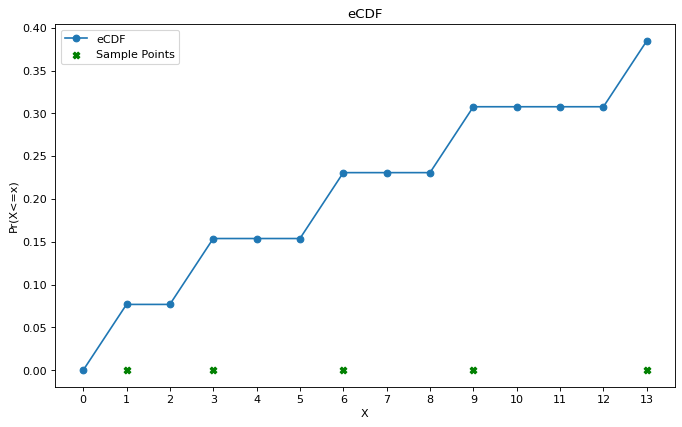

In [ ]:
samples=take_input()
X,Y=generate_lists(samples)
generate_plot(X,Y,samples)

# 4-B

In [ ]:
import random

In [ ]:
def generate_samples(n,lower,upper):
  samples=[]
  for i in range(n):
    samples.append(random.randint(lower,upper))
  return samples
def plot_graphs(X,Y,samples):
  plt.figure(figsize=(15, 6), dpi=80)
  plt.plot(X,Y,label="eCDF")
  plt.scatter(samples,[0 for i in range(len(samples))],color="green",marker="X",label="Sample Points")
  plt.xticks(rotation = 90)
  x_ticks=X
  plt.title("eCDF")
  plt.xlabel("X")
  plt.ylabel("Pr(X<=x)")
  x_labels=list(map(str,X))
  plt.legend()
  plt.xticks(ticks=x_ticks, labels=x_labels)
  

In [ ]:
lower,upper=1,99

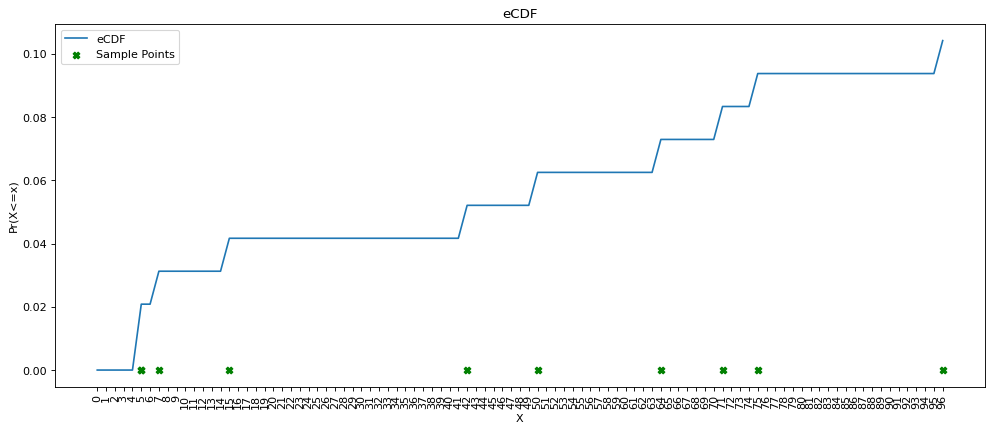

In [ ]:
n=10
samples=generate_samples(n,lower,upper)
X,Y=generate_lists(samples)
plot_graphs(X,Y,samples)

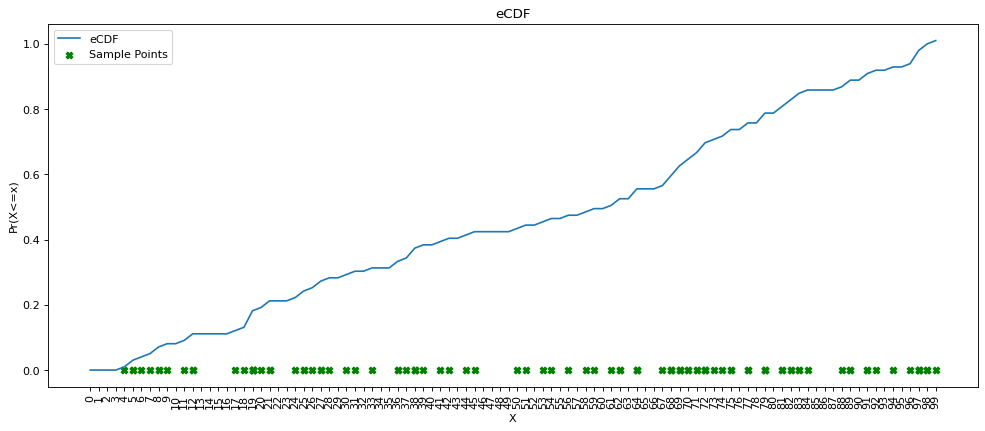

In [ ]:
n=100
samples=generate_samples(n,lower,upper)
X,Y=generate_lists(samples)
plot_graphs(X,Y,samples)

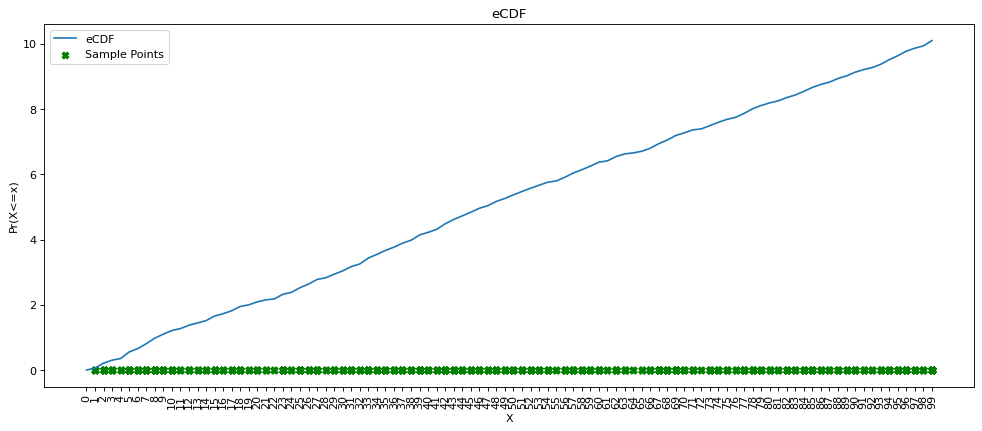

In [ ]:
n=1000
samples=generate_samples(n,lower,upper)
X,Y=generate_lists(samples)
plot_graphs(X,Y,samples)

# 4-C

In [ ]:
def take_input():
  values=set()
  cnt=0
  r=int(input("Enter the Number of rows "))
  data=[]
  for i in range(r):
    row=input("Enter row "+str(i+1)+" values seperared by space")
    row=list(map(int,row.split()))
    cnt+=len(row)
    for i in row:
      values.add(i)
    data.append(row)
  return data,values

In [ ]:
import collections
def generate_count(value,row):
  cnt=0
  for i in row:
    if i<=value:
      cnt+=1
  return cnt/len(row)
def generate_cdf(data,values):
  d=collections.defaultdict(list)
  for i in values:
    for j in data:
      d[i].append(generate_count(i,j))
  for i in d:
    d[i]=sum(d[i])/len(d[i])
  d=dict(sorted(d.items(),key=lambda x:x[0]))
  return d


Enter the Number of rows 3
Enter row 1 values seperared by space1 3 5
Enter row 2 values seperared by space2 6 9
Enter row 3 values seperared by space2 7 12


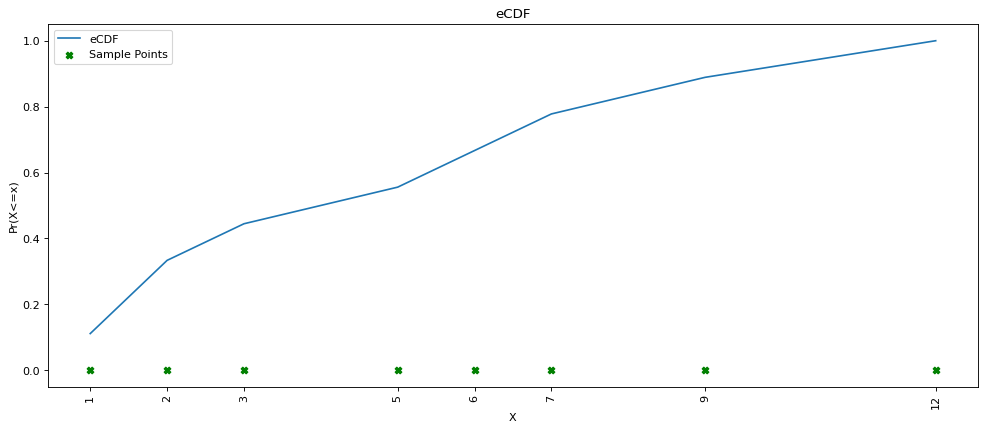

In [ ]:
data,values=take_input()
d=generate_cdf(data,values)
values=sorted(list(values))
plot_graphs(list(d.keys()),list(d.values()),values)

# 4-D

In [ ]:
n=10

In [ ]:
def generate_data(n,m):
  data,values=[],set()
  for i in range(n):
    row=[]
    for j in range(m):
      k=random.randint(1,99)
      row.append(k)
      values.add(k)
    data.append(row)
  return data,values

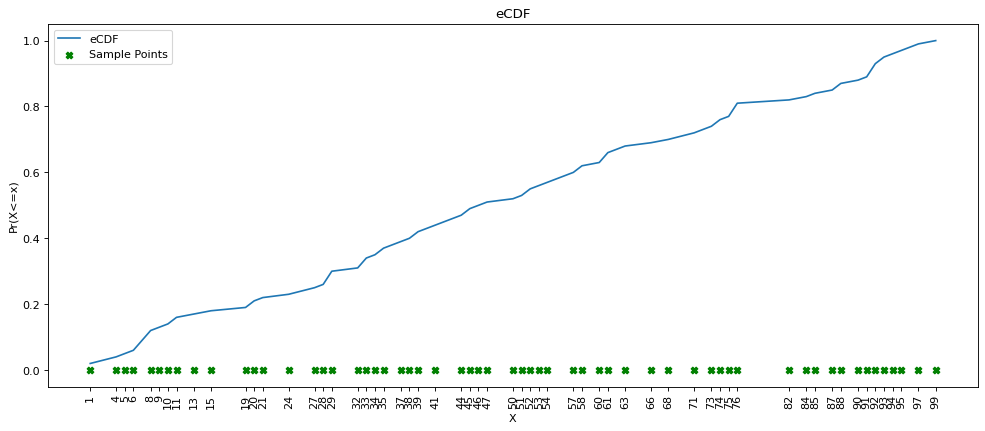

In [ ]:
m=10
data,values=generate_data(n,m)
d=generate_cdf(data,values)
values=sorted(list(values))
plot_graphs(list(d.keys()),list(d.values()),values)

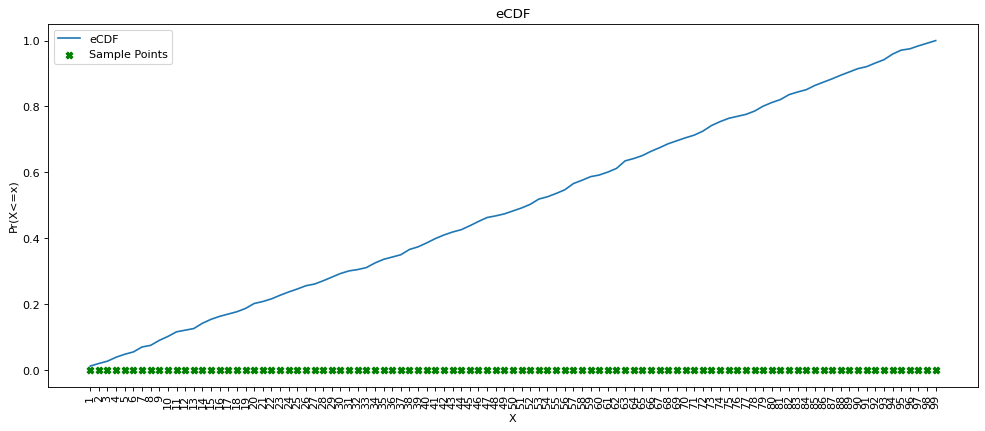

In [ ]:
m=100
data,values=generate_data(n,m)
d=generate_cdf(data,values)
values=sorted(list(values))
plot_graphs(list(d.keys()),list(d.values()),values)

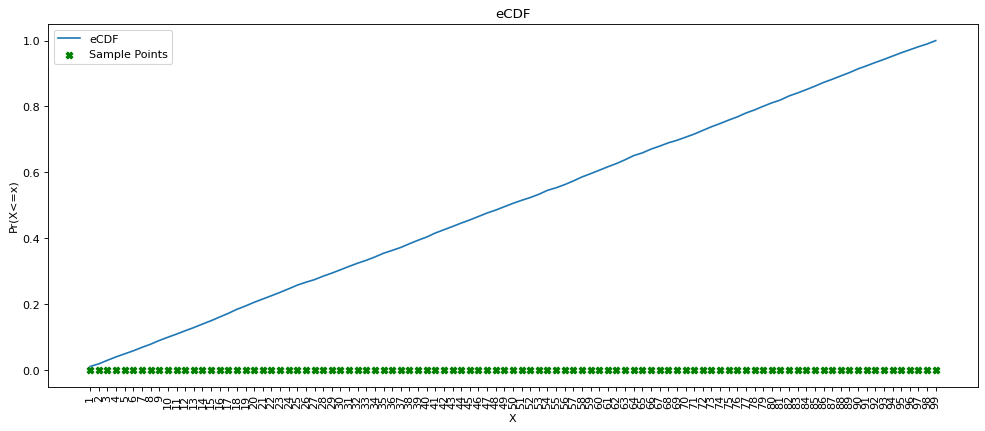

In [ ]:
m=1000
data,values=generate_data(n,m)
d=generate_cdf(data,values)
values=sorted(list(values))
plot_graphs(list(d.keys()),list(d.values()),values)

# 4 - E & 4 - F

In [ ]:
import pandas as pd

data=pd.read_csv("/content/a3_q4.csv",header=None)
data.shape

(799, 1)

In [ ]:
def ciPlot(samples,data):
  n=len(samples)
  Y=[]
  for k in data:
    cnt=0
    for i in samples:
      if i<=k:
        cnt+=1
    Y.append(cnt/n)
  return Y


In [ ]:
def generate_plot(x,y,ci,dkwCi):
    plt.figure('eCDF')
    plt.plot(x, y ,label='eCDF')
    
    plt.plot(x, (y+ci) ,label = '95% Normal CI ', color = 'red')
    plt.plot(x,(y-ci) , color = 'red')
    
    plt.plot(x, (np.array(y)+dkwCi) ,label = '95% DKW CI ', color = 'orange')
    plt.plot(x, (np.array(y)-dkwCi), color = 'orange')
    
    plt.legend()
    plt.show()

    plt.figure('eCDF')
    plt.plot(x, y ,label='eCDF')
    
    plt.plot(x, (y+ci) ,label = '95% Normal CI ', color = 'gray')
    plt.plot(x,(y-ci) , color = 'gray')
    plt.legend()
    plt.show()

In [ ]:
data=list(data[:][0])
len(data)

799

Enter the number of samples 5
Enter the samples
0.1
0.2
0.3
0.3
0.5


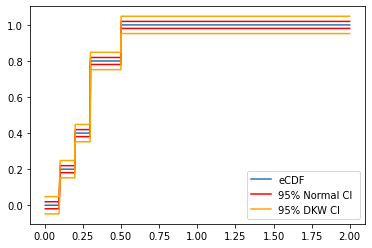

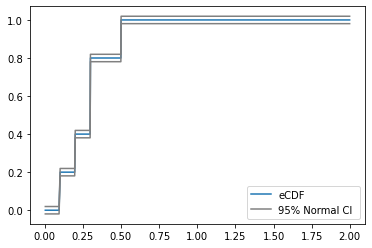

In [ ]:
x_e=sorted(list(set(data)))
samples=take_input()
Y=ciPlot(samples,x_e)
n=math.ceil(max(x_e))
normalCi = 1.96 * np.std(Y)/np.sqrt(len(x_e))
dkwCi=math.sqrt((1/(2*len(x_e))*math.log((2/0.05))))
generate_plot(x_e,Y,normalCi,dkwCi)
